In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.metrics import r2_score
from matplotlib.offsetbox import AnchoredText

In [3]:
moffat_filename = "moffatResults.txt"
moffatWithBoost_filename = "moffatWithBoostResults.txt"

def get_results(filename):
    x = []
    y_execution_time = []
    
    y_push_time, y_push_count, y_push_average = [], [], []
    y_pop_time, y_pop_count, y_pop_average = [], [], []
    y_cleanUp_time, y_cleanUp_count, y_cleanUp_average = [], [], []
    
    with open(filename) as file:
        for line in file:
            line = line.replace("\n", "")
            values = line.split("|")
            x.append(int(values[0]))
            y_execution_time.append(float(values[1].split("=")[1])/1000) #s
            
            y_push_time.append(float(values[2].split("=")[1])/1000) #s
            y_push_count.append(int(values[3].split("=")[1]))
            y_push_average.append(float(values[4].split("=")[1])) # us
            
            y_pop_time.append(float(values[5].split("=")[1])/1000) #s
            y_pop_count.append(int(values[6].split("=")[1]))
            y_pop_average.append(float(values[7].split("=")[1])) # us
            
            y_cleanUp_time.append(float(values[8].split("=")[1])/1000) #s
            y_cleanUp_count.append(int(values[9].split("=")[1]))
            y_cleanUp_average.append(float(values[10].split("=")[1])) # us
            
    return x, [y_execution_time, \
               y_push_time, y_push_count, y_push_average, \
               y_pop_time, y_pop_count, y_pop_average, \
               y_cleanUp_time, y_cleanUp_count, y_cleanUp_average]

In [26]:
def plotResults(op, title, xlabel, ylabel, plotMoffat=True, plotMoffatWithBoost=True):
    x_moffat, y_operations_moffat = get_results(moffat_filename)
    y_moffat = y_operations_moffat[op]
    x_moffatWithBoost, y_operations_moffatWithBoost = get_results(moffatWithBoost_filename)
    y_moffatWithBoost = y_operations_moffatWithBoost[op]
    fig, ax = plt.subplots(figsize=(10, 6))
    if(plotMoffat): 
        ax.plot(x_moffat, y_moffat, label="Moffat and Takaoka")
    if(plotMoffatWithBoost): 
        ax.plot(x_moffatWithBoost, y_moffatWithBoost, label="With Boost")
    ax.set_xlabel(xlabel, fontsize="x-large")
    ax.set_ylabel(ylabel, fontsize="x-large")
    ax.set_title(title, fontsize="x-large")
    ax.legend(loc='upper left', bbox_to_anchor=(0.1, 0.8), fontsize="large")
    
def getRatio(op, title, xlabel, ylabel):
    x_moffat, y_operations_moffat = get_results(moffat_filename)
    y_moffat = y_operations_moffat[op]
    x_moffatWithBoost, y_operations_moffatWithBoost = get_results(moffatWithBoost_filename)
    y_moffatWithBoost = y_operations_moffatWithBoost[op]
    y = []
    constant = [1 for i in range(0, len(y_moffat))]
    for i in range(len(y_moffat)):
        y.append(y_moffatWithBoost[i] / y_moffat[i])
        
    fig, ax = plt.subplots(figsize=(10, 6)) 
    ax.plot(x_moffat, y)
    ax.plot(x_moffat, constant)
    ax.set_ylim([0, max(y)+1])
    ax.set_xlabel(xlabel, fontsize="x-large")
    ax.set_ylabel(ylabel, fontsize="x-large")
    ax.set_title(title, fontsize="x-large")


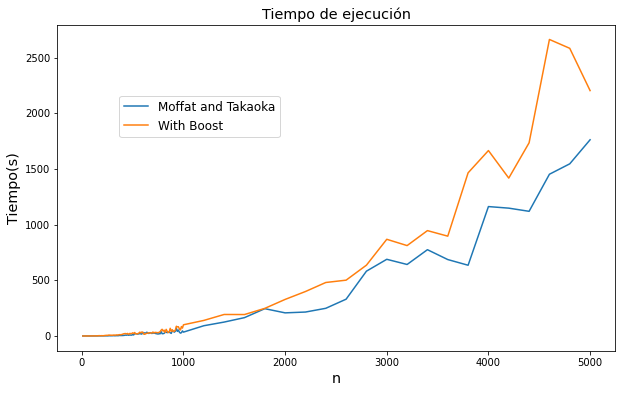

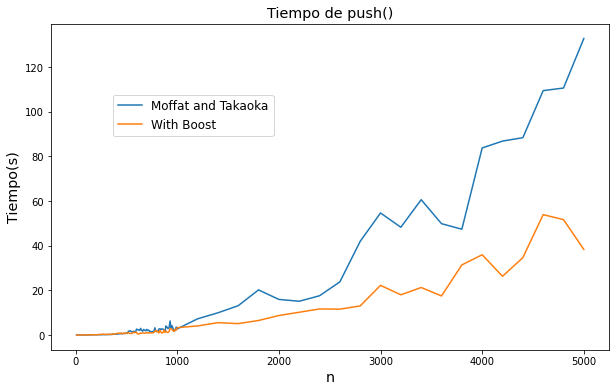

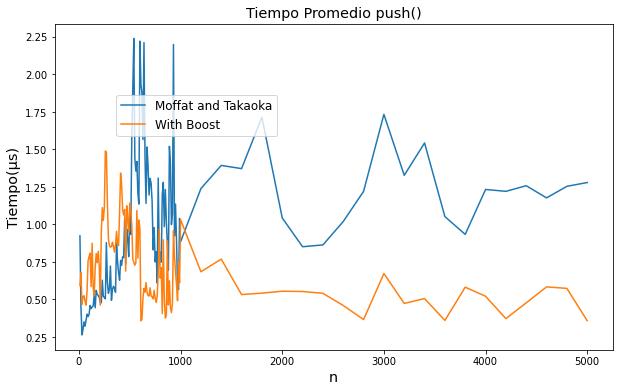

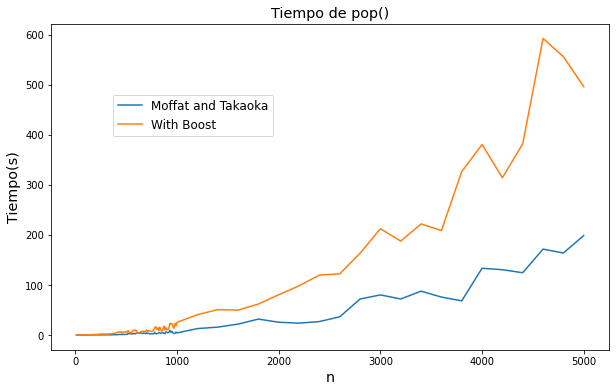

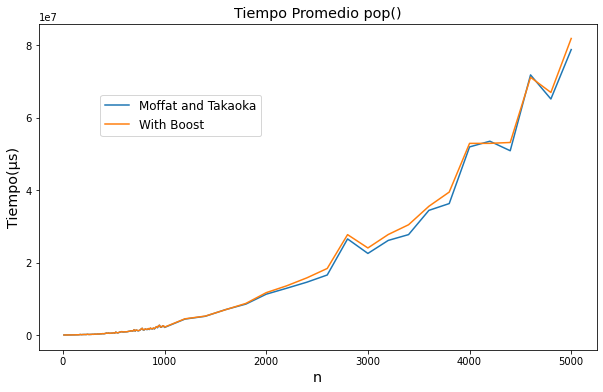

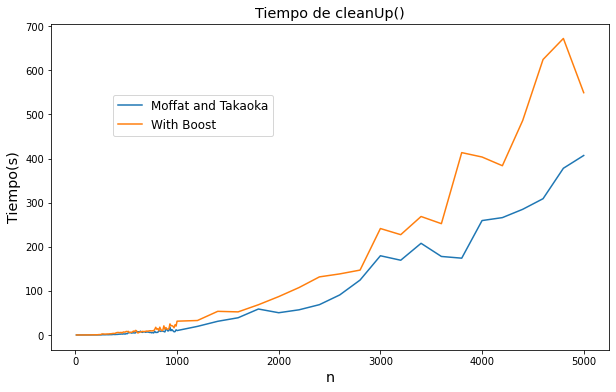

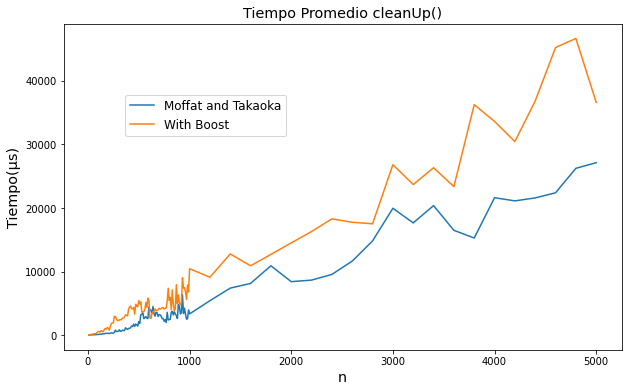

In [29]:
plotResults(0, "Tiempo de ejecución", "n", "Tiempo(s)")
plotResults(1, "Tiempo de push()", "n", "Tiempo(s)")
plotResults(3, "Tiempo Promedio push()", "n", "Tiempo(μs)")
plotResults(4, "Tiempo de pop()", "n", "Tiempo(s)")
plotResults(5, "Tiempo Promedio pop()", "n", "Tiempo(μs)")
plotResults(7, "Tiempo de cleanUp()", "n", "Tiempo(s)")
plotResults(9, "Tiempo Promedio cleanUp()", "n", "Tiempo(μs)")


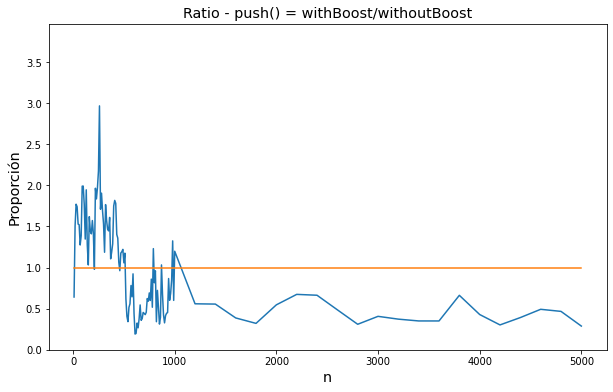

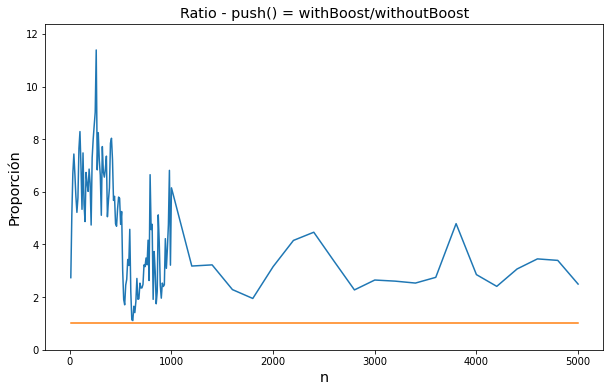

In [28]:
getRatio(1, "Ratio - push() = withBoost/withoutBoost", "n", "Proporción")
getRatio(4, "Ratio - push() = withBoost/withoutBoost", "n", "Proporción")